In [2]:
# Imports and setup
import pandas as pd
import numpy as np
import scipy as sc
import seaborn as sns

import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams["figure.figsize"] = (10, 6)



Load dataset and print it 

In [3]:
# Loading the movies dataset into df1 and printing it to show the result.
df1 = pd.read_csv("check.csv")
display(df1)

,movie_title,director_name,title_year,facenumber_in_poster,director_facebook_likes,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,actor_3_name,...,movie_facebook_likes,cast_total_facebook_likes,imdb_score,num_voted_users,language,country,color,aspect_ratio,content_rating,movie_imdb_link
0,Avatar,James Cameron,2009.0,0,0.0,CCH Pounder,1000.0,Joel David Moore,936.0,Wes Studi,...,33000,4834,7.9,886204,English,USA,Color,1.78,PG-13,http://www.imdb.com/title/tt0499549/?ref_=fn_t...
1,Pirates of the Caribbean: At World's End,Gore Verbinski,2007.0,0,563.0,Johnny Depp,40000.0,Orlando Bloom,5000.0,Jack Davenport,...,0,48350,7.1,471220,English,USA,Color,2.35,PG-13,http://www.imdb.com/title/tt0449088/?ref_=fn_t...
2,Spectre,Sam Mendes,2015.0,1,0.0,Christoph Waltz,11000.0,Rory Kinnear,393.0,Stephanie Sigman,...,85000,11700,6.8,275868,English,UK,Color,2.35,PG-13,http://www.imdb.com/title/tt2379713/?ref_=fn_t...
3,The Dark Knight Rises,Christopher Nolan,2012.0,0,22000.0,Tom Hardy,27000.0,Christian Bale,23000.0,Joseph Gordon-Levitt,...,164000,106759,8.5,1144337,English,USA,Color,2.35,PG-13,http://www.imdb.com/title/tt1345836/?ref_=fn_t...
4,Star Wars: Episode VII - The Force Awakens ...,Doug Walker,NaN,0,131.0,Doug Walker,131.0,Rob Walker,12.0,NaN,...,0,143,7.1,8,NaN,NaN,Color,NaN,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Signed Sealed Delivered,Scott Smith,2013.0,2,2.0,Eric Mabius,637.0,Daphne Zuniga,470.0,Crystal Lowe,...,84,2283,7.7,629,English,Canada,Color,NaN,NaN,http://www.imdb.com/title/tt3000844/?ref_=fn_t...
5039,The Following,NaN,NaN,1,NaN,Natalie Zea,841.0,Valorie Curry,593.0,Sam Underwood,...,32000,1753,7.5,73839,English,USA,Color,16.00,TV-14,http://www.imdb.com/title/tt2071645/?ref_=fn_t...
5040,A Plague So Pleasant,Benjamin Roberds,2013.0,0,0.0,Eva Boehnke,0.0,Maxwell Moody,0.0,David Chandler,...,16,0,6.3,38,English,USA,Color,NaN,NaN,http://www.imdb.com/title/tt2107644/?ref_=fn_t...
5041,Shanghai Calling,Daniel Hsia,2012.0,5,0.0,Alan Ruck,946.0,Daniel Henney,719.0,Eliza Coupe,...,660,2386,6.3,1255,English,USA,Color,2.35,PG-13,http://www.imdb.com/title/tt2070597/?ref_=fn_t...


In [5]:
print(df1.shape) #returns (no of rows, no of cols)

(5043, 28)


In [7]:
# First thing we did is describing the dataset to check the values. We used pd.option to show all of the columns without skipping
with pd.option_context("display.max_rows", None, "display.max_columns", None):#None sets no limits
    display(df1.describe(include="all"))

,movie_title,director_name,title_year,facenumber_in_poster,director_facebook_likes,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,actor_3_name,actor_3_facebook_likes,duration,genres,plot_keywords,budget,gross,num_critic_for_reviews,num_user_for_reviews,movie_facebook_likes,cast_total_facebook_likes,imdb_score,num_voted_users,language,country,color,aspect_ratio,content_rating,movie_imdb_link
count,5043,4939,4935.000000,5043.000000,4939.000000,5036,5036.000000,5030,5030.000000,5020,5020.000000,5028.000000,5043,4890,4.551000e+03,4.159000e+03,4993.000000,5022.000000,5043.000000,5043.000000,5043.000000,5.043000e+03,5041,5041,5043,4714.000000,4740,5043
unique,4917,2398,NaN,NaN,NaN,2097,NaN,3032,NaN,3521,NaN,NaN,914,4760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47,65,2,NaN,18,4919
top,Ben-Hur,Steven Spielberg,NaN,NaN,NaN,Robert De Niro,NaN,Morgan Freeman,NaN,John Heard,NaN,NaN,Drama,based on novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,USA,Color,NaN,R,http://www.imdb.com/title/tt0360717/?ref_=fn_t...
freq,3,26,NaN,NaN,NaN,49,NaN,20,NaN,8,NaN,NaN,236,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4714,3810,4834,NaN,2118,3
mean,NaN,NaN,2002.470517,1.375967,686.509212,NaN,6560.047061,NaN,1651.754473,NaN,645.009761,107.201074,NaN,NaN,3.331943e+07,4.846841e+07,140.194272,272.770808,7525.964505,9699.063851,6.442138,8.366816e+04,NaN,NaN,NaN,2.220403,NaN,NaN
std,NaN,NaN,12.474599,2.017534,2813.328607,NaN,15020.759120,NaN,4042.438863,NaN,1665.041728,25.197441,NaN,NaN,4.150046e+07,6.845299e+07,121.601675,377.982886,19320.445110,18163.799124,1.125116,1.384853e+05,NaN,NaN,NaN,1.385113,NaN,NaN
min,NaN,NaN,1916.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,7.000000,NaN,NaN,2.180000e+02,1.620000e+02,1.000000,1.000000,0.000000,0.000000,1.600000,5.000000e+00,NaN,NaN,NaN,1.180000,NaN,NaN
25%,NaN,NaN,1999.000000,0.000000,7.000000,NaN,614.000000,NaN,281.000000,NaN,133.000000,93.000000,NaN,NaN,6.000000e+06,5.340988e+06,50.000000,65.000000,0.000000,1411.000000,5.800000,8.593500e+03,NaN,NaN,NaN,1.850000,NaN,NaN
50%,NaN,NaN,2005.000000,1.000000,49.000000,NaN,988.000000,NaN,595.000000,NaN,371.500000,103.000000,NaN,NaN,1.990000e+07,2.551750e+07,110.000000,156.000000,166.000000,3090.000000,6.600000,3.435900e+04,NaN,NaN,NaN,2.350000,NaN,NaN
75%,NaN,NaN,2011.000000,2.000000,194.500000,NaN,11000.000000,NaN,918.000000,NaN,636.000000,118.000000,NaN,NaN,4.250000e+07,6.230944e+07,195.000000,326.000000,3000.000000,13756.500000,7.200000,9.630900e+04,NaN,NaN,NaN,2.350000,NaN,NaN


In [8]:
# Checking for duplicate rows and printing it to show the result.
duplicateRowsDF = df1[df1.duplicated()] 
display(duplicateRowsDF)

,movie_title,director_name,title_year,facenumber_in_poster,director_facebook_likes,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,actor_3_name,...,movie_facebook_likes,cast_total_facebook_likes,imdb_score,num_voted_users,language,country,color,aspect_ratio,content_rating,movie_imdb_link
137,The Legend of Tarzan,David Yates,2016.0,2,282.0,Christoph Waltz,11000.0,Alexander Skarsgård,10000.0,Casper Crump,...,29000,21175,6.6,42372,English,USA,Color,2.35,PG-13,http://www.imdb.com/title/tt0918940/?ref_=fn_t...
187,The Twilight Saga: Breaking Dawn - Part 2,Bill Condon,2012.0,3,386.0,Robert Pattinson,21000.0,Kristen Stewart,17000.0,Taylor Lautner,...,65000,59177,5.5,185394,English,USA,Color,2.35,PG-13,http://www.imdb.com/title/tt1673434/?ref_=fn_t...
204,Godzilla Resurgence,Hideaki Anno,2016.0,0,28.0,Mark Chinnery,544.0,Shin'ya Tsukamoto,106.0,Atsuko Maeda,...,0,699,8.2,374,Japanese,Japan,Color,2.35,NaN,http://www.imdb.com/title/tt4262980/?ref_=fn_t...
303,Pan,Joe Wright,2015.0,4,456.0,Hugh Jackman,20000.0,Cara Delevingne,548.0,Nonso Anozie,...,24000,21393,5.8,39956,English,USA,Color,2.35,PG,http://www.imdb.com/title/tt3332064/?ref_=fn_t...
389,Fantastic Four,Josh Trank,2015.0,3,128.0,Tim Blake Nelson,596.0,Reg E. Cathey,360.0,Tim Heidecker,...,41000,1261,4.3,110486,English,USA,Color,2.35,PG-13,http://www.imdb.com/title/tt1502712/?ref_=fn_t...
395,The Fast and the Furious,Rob Cohen,2001.0,2,357.0,Paul Walker,23000.0,Vin Diesel,14000.0,Jordana Brewster,...,14000,45327,6.7,272223,English,USA,Color,2.35,PG-13,http://www.imdb.com/title/tt0232500/?ref_=fn_t...
590,Hercules,Brett Ratner,2014.0,0,420.0,Dwayne Johnson,12000.0,Rufus Sewell,3000.0,Ingrid Bolsø Berdal,...,21000,16235,6.0,115687,English,USA,Color,2.35,PG-13,http://www.imdb.com/title/tt1267297/?ref_=fn_t...
656,Total Recall,Paul Verhoeven,1990.0,0,719.0,Ronny Cox,605.0,Rachel Ticotin,308.0,Marshall Bell,...,0,1441,7.5,240241,English,USA,Color,1.85,R,http://www.imdb.com/title/tt0100802/?ref_=fn_t...
794,The Avengers,Joss Whedon,2012.0,3,0.0,Chris Hemsworth,26000.0,Robert Downey Jr.,21000.0,Scarlett Johansson,...,123000,87697,8.1,995415,English,USA,Color,1.85,PG-13,http://www.imdb.com/title/tt0848228/?ref_=fn_t...
1220,Unbroken,Angelina Jolie Pitt,2014.0,0,11000.0,Finn Wittrock,769.0,Jack O'Connell,698.0,Alex Russell,...,35000,2938,7.2,103589,English,USA,Color,2.35,PG-13,http://www.imdb.com/title/tt1809398/?ref_=fn_t...


In [9]:
# Updating df1 without the duplicates rows and printing it to show the result.
df1 = df1.drop_duplicates(subset=None, keep="first", inplace=False)
df1 = df1.reset_index(drop=True)
df1

,movie_title,director_name,title_year,facenumber_in_poster,director_facebook_likes,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,actor_3_name,...,movie_facebook_likes,cast_total_facebook_likes,imdb_score,num_voted_users,language,country,color,aspect_ratio,content_rating,movie_imdb_link
0,Avatar,James Cameron,2009.0,0,0.0,CCH Pounder,1000.0,Joel David Moore,936.0,Wes Studi,...,33000,4834,7.9,886204,English,USA,Color,1.78,PG-13,http://www.imdb.com/title/tt0499549/?ref_=fn_t...
1,Pirates of the Caribbean: At World's End,Gore Verbinski,2007.0,0,563.0,Johnny Depp,40000.0,Orlando Bloom,5000.0,Jack Davenport,...,0,48350,7.1,471220,English,USA,Color,2.35,PG-13,http://www.imdb.com/title/tt0449088/?ref_=fn_t...
2,Spectre,Sam Mendes,2015.0,1,0.0,Christoph Waltz,11000.0,Rory Kinnear,393.0,Stephanie Sigman,...,85000,11700,6.8,275868,English,UK,Color,2.35,PG-13,http://www.imdb.com/title/tt2379713/?ref_=fn_t...
3,The Dark Knight Rises,Christopher Nolan,2012.0,0,22000.0,Tom Hardy,27000.0,Christian Bale,23000.0,Joseph Gordon-Levitt,...,164000,106759,8.5,1144337,English,USA,Color,2.35,PG-13,http://www.imdb.com/title/tt1345836/?ref_=fn_t...
4,Star Wars: Episode VII - The Force Awakens ...,Doug Walker,NaN,0,131.0,Doug Walker,131.0,Rob Walker,12.0,NaN,...,0,143,7.1,8,NaN,NaN,Color,NaN,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,Signed Sealed Delivered,Scott Smith,2013.0,2,2.0,Eric Mabius,637.0,Daphne Zuniga,470.0,Crystal Lowe,...,84,2283,7.7,629,English,Canada,Color,NaN,NaN,http://www.imdb.com/title/tt3000844/?ref_=fn_t...
4994,The Following,NaN,NaN,1,NaN,Natalie Zea,841.0,Valorie Curry,593.0,Sam Underwood,...,32000,1753,7.5,73839,English,USA,Color,16.00,TV-14,http://www.imdb.com/title/tt2071645/?ref_=fn_t...
4995,A Plague So Pleasant,Benjamin Roberds,2013.0,0,0.0,Eva Boehnke,0.0,Maxwell Moody,0.0,David Chandler,...,16,0,6.3,38,English,USA,Color,NaN,NaN,http://www.imdb.com/title/tt2107644/?ref_=fn_t...
4996,Shanghai Calling,Daniel Hsia,2012.0,5,0.0,Alan Ruck,946.0,Daniel Henney,719.0,Eliza Coupe,...,660,2386,6.3,1255,English,USA,Color,2.35,PG-13,http://www.imdb.com/title/tt2070597/?ref_=fn_t...


In [10]:
# Fixing the missing values with filling None in any NaN category feature and 0.0 or mean in any numeric feature.
df1["director_name"] = df1["director_name"].fillna("None")
df1["director_facebook_likes"] = df1["director_facebook_likes"].fillna(0.0).astype(np.float)
df1["actor_1_name"] = df1["actor_1_name"].fillna("None")
df1["actor_1_facebook_likes"] = df1["actor_1_facebook_likes"].fillna(0.0).astype(np.float)
df1["actor_2_name"] = df1["actor_2_name"].fillna("None")
df1["actor_2_facebook_likes"] = df1["actor_2_facebook_likes"].fillna(0.0).astype(np.float)
df1["actor_3_name"]=df1["actor_3_name"].fillna("None")
df1["actor_3_facebook_likes"] = df1["actor_3_facebook_likes"].fillna(0.0).astype(np.float)
df1["plot_keywords"] = df1["plot_keywords"].fillna("None")
df1["budget"] = df1["budget"].fillna(df1["budget"].mean()).astype(np.int)
df1["gross"] = df1["gross"].fillna(0.0).astype(np.float)
df1["num_critic_for_reviews"] = df1["num_critic_for_reviews"].fillna(0.0).astype(np.float)
df1["num_user_for_reviews"] = df1["num_user_for_reviews"].fillna(0.0).astype(np.float)
df1["cast_total_facebook_likes"] = df1["cast_total_facebook_likes"].fillna(0.0).astype(np.float)
df1["language"] = df1["language"].fillna("None")
df1["country"] = df1["country"].fillna("None")
df1["title_year"] = df1["title_year"].fillna(df1["title_year"].mean()).astype(np.int)

# Describing df1 again to show the result
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    display(df1.describe(include="all"))

,movie_title,director_name,title_year,facenumber_in_poster,director_facebook_likes,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,actor_3_name,actor_3_facebook_likes,duration,genres,plot_keywords,budget,gross,num_critic_for_reviews,num_user_for_reviews,movie_facebook_likes,cast_total_facebook_likes,imdb_score,num_voted_users,language,country,color,aspect_ratio,content_rating,movie_imdb_link
count,4998,4998,4998.000000,4998.000000,4998.000000,4998,4998.000000,4998,4998.000000,4998,4998.000000,4983.000000,4998,4998,4.998000e+03,4.998000e+03,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4.998000e+03,4998,4998,4998,4671.000000,4697,4998
unique,4917,2399,NaN,NaN,NaN,2098,NaN,3033,NaN,3522,NaN,NaN,914,4761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47,66,2,NaN,18,4919
top,King Kong,None,NaN,NaN,NaN,Robert De Niro,NaN,Morgan Freeman,NaN,None,NaN,NaN,Drama,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,USA,Color,NaN,R,http://www.imdb.com/title/tt2224026/?ref_=fn_t...
freq,3,103,NaN,NaN,NaN,49,NaN,20,NaN,23,NaN,NaN,235,152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4672,3776,4791,NaN,2098,3
mean,NaN,NaN,2002.458784,1.373749,674.486595,NaN,6547.756503,NaN,1638.725290,NaN,636.956182,107.213325,NaN,NaN,3.325764e+07,3.987495e+07,138.518607,270.871749,7487.430172,9676.941176,6.441056,8.347020e+04,NaN,NaN,NaN,2.221417,NaN,NaN
std,NaN,NaN,12.341134,2.018616,2794.131614,NaN,15053.031387,NaN,4026.548424,NaN,1640.084097,25.248775,NaN,NaN,3.932119e+07,6.440755e+07,121.663934,377.392036,19290.726563,18165.404578,1.124107,1.380866e+05,NaN,NaN,NaN,1.391185,NaN,NaN
min,NaN,NaN,1916.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,7.000000,NaN,NaN,2.180000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.600000,5.000000e+00,NaN,NaN,NaN,1.180000,NaN,NaN
25%,NaN,NaN,1999.000000,0.000000,6.000000,NaN,610.250000,NaN,277.250000,NaN,130.000000,93.000000,NaN,NaN,7.000000e+06,3.041272e+05,48.000000,64.000000,0.000000,1405.500000,5.800000,8.560000e+03,NaN,NaN,NaN,1.850000,NaN,NaN
50%,NaN,NaN,2005.000000,1.000000,44.500000,NaN,984.000000,NaN,593.000000,NaN,366.000000,103.000000,NaN,NaN,2.300000e+07,1.517574e+07,108.000000,155.000000,162.500000,3085.500000,6.600000,3.426050e+04,NaN,NaN,NaN,2.350000,NaN,NaN
75%,NaN,NaN,2011.000000,2.000000,189.000000,NaN,11000.000000,NaN,912.750000,NaN,634.750000,118.000000,NaN,NaN,4.000000e+07,5.137692e+07,193.000000,323.000000,3000.000000,13740.500000,7.200000,9.612075e+04,NaN,NaN,NaN,2.350000,NaN,NaN


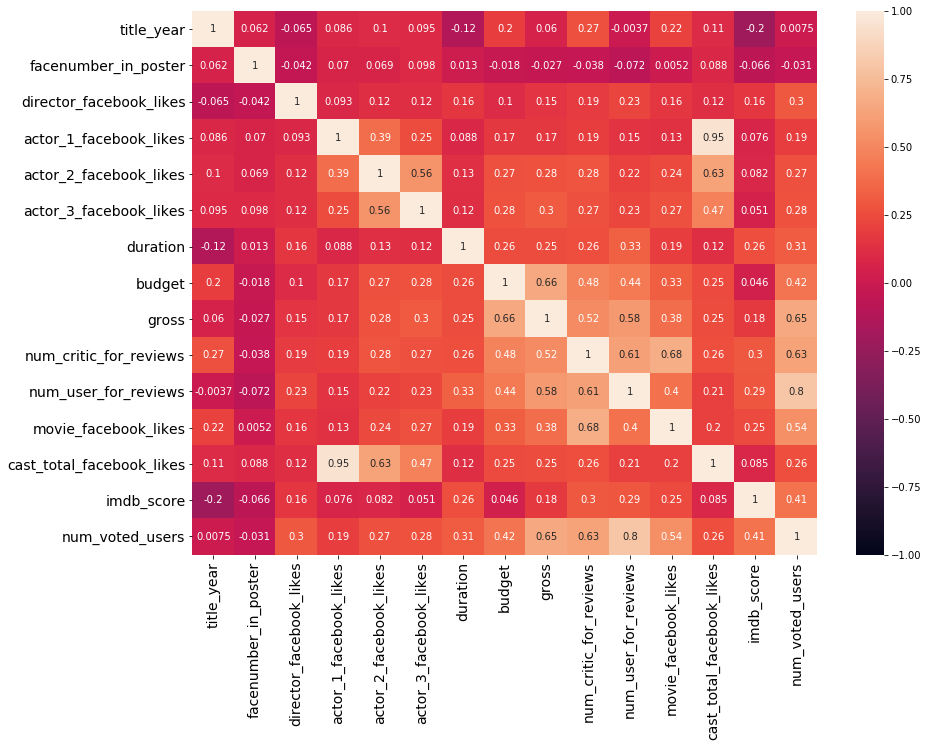

In [11]:
# After some interesting plots, we'll start using several regression and prediction algorithms.

# In this cell we made a correlation heatmap after filtering some features.
df2 = df1[["title_year", "facenumber_in_poster", "director_facebook_likes", "actor_1_facebook_likes", "actor_2_facebook_likes",
          "actor_3_facebook_likes", "duration", "budget", "gross", "num_critic_for_reviews", "num_user_for_reviews",
          "movie_facebook_likes", "cast_total_facebook_likes", "imdb_score", "num_voted_users"]]

fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap(df2.corr(), ax=ax, annot=True, vmin=-1, vmax=1, cbar=True);
ax.tick_params(axis="both", labelsize=14)

# As we can infer from the heatmap below:
# 1. The "cast_total_facebook_likes" has a strong positive correlation with the "actor_1_facebook_likes"
# and has smaller positive correlation with both "actor_2_facebook_likes" and "actor_3_facebook_likes".
# 2. The "movie_facebook_likes" has a strong correlation with "num_critic_for_reviews", meaning that the popularity of a movie
# in social network can be largely affected by the critics.
# 3. The "movie_facebook_likes" has relatively large correlation with the "num_voted_users".
# 4. The movie "gross" has strong positive correlation with the "num_voted_users".

In [12]:
# We defined df2 to store df1 with several new columns. For any English language we set 1 in language_num column,
# For any USA country we set 1 in country_num column and for any colored movie we set 1 in color_num column.
df2 = df1
i = 0
for l in df2["language"]:
    if(l == "English"):
        df2.at[i, "language_num"] = 1
    else:
        df2.at[i, "language_num"] = 0
    i = i + 1

i = 0    
for ctry in df2["country"]:
    if(ctry == "USA"):
        df2.at[i, "country_num"] = 1
    else:
        df2.at[i, "country_num"] = 0
    i = i + 1

i = 0
for clr in df2["color"]:
    if(clr == "Color"):
        df2.at[i, "color_num"] = 1
    else:
        df2.at[i, "color_num"] = 0
    i = i + 1

# In this part we splitted the dataset genres to any genre from the dataset and we set 1 in any movie genre, otherwise- 0.
i = 0
for g in df1["genres"]:
    splitted = g.split("|", )
    for s in splitted:
        df2.at[i, s] = 1
    i = i + 1

df2.update(df2[["Action","Adventure","Fantasy", "Sci-Fi", "Thriller", "Documentary", "Romance", "Animation", "Comedy", "Family", "Musical", "Mystery", "Western", "Drama", "History", "Sport", "Crime", "Horror", "War", "Biography", "Music", "Game-Show", "Reality-TV", "News", "Short", "Film-Noir"]].fillna(0))

# Displaying to show the result
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    display(df2.describe(include="all"))
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    display(df2.head())

,movie_title,director_name,title_year,facenumber_in_poster,director_facebook_likes,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,actor_3_name,actor_3_facebook_likes,duration,genres,plot_keywords,budget,gross,num_critic_for_reviews,num_user_for_reviews,movie_facebook_likes,cast_total_facebook_likes,imdb_score,num_voted_users,language,country,color,aspect_ratio,content_rating,movie_imdb_link,language_num,country_num,color_num,Action,Adventure,Fantasy,Sci-Fi,Thriller,Documentary,Romance,Animation,Comedy,Family,Musical,Mystery,Western,Drama,History,Sport,Crime,Horror,War,Biography,Music,Game-Show,Reality-TV,News,Short,Film-Noir
count,4998,4998,4998.000000,4998.000000,4998.000000,4998,4998.000000,4998,4998.000000,4998,4998.000000,4983.000000,4998,4998,4.998000e+03,4.998000e+03,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4.998000e+03,4998,4998,4998,4671.000000,4697,4998,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000
unique,4917,2399,NaN,NaN,NaN,2098,NaN,3033,NaN,3522,NaN,NaN,914,4761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47,66,2,NaN,18,4919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,King Kong,None,NaN,NaN,NaN,Robert De Niro,NaN,Morgan Freeman,NaN,None,NaN,NaN,Drama,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,USA,Color,NaN,R,http://www.imdb.com/title/tt2224026/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,103,NaN,NaN,NaN,49,NaN,20,NaN,23,NaN,NaN,235,152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4672,3776,4791,NaN,2098,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2002.458784,1.373749,674.486595,NaN,6547.756503,NaN,1638.725290,NaN,636.956182,107.213325,NaN,NaN,3.325764e+07,3.987495e+07,138.518607,270.871749,7487.430172,9676.941176,6.441056,8.347020e+04,NaN,NaN,NaN,2.221417,NaN,NaN,0.934774,0.755502,0.958583,0.228691,0.182873,0.120848,0.122249,0.279312,0.024210,0.219688,0.048419,0.372549,0.108844,0.026411,0.098639,0.018808,0.514406,0.041016,0.036214,0.176671,0.111244,0.042217,0.058423,0.042417,0.000200,0.000400,0.000600,0.001000,0.001200
std,NaN,NaN,12.341134,2.018616,2794.131614,NaN,15053.031387,NaN,4026.548424,NaN,1640.084097,25.248775,NaN,NaN,3.932119e+07,6.440755e+07,121.663934,377.392036,19290.726563,18165.404578,1.124107,1.380866e+05,NaN,NaN,NaN,1.391185,NaN,NaN,0.246949,0.429832,0.199272,0.420032,0.386601,0.325984,0.327606,0.448706,0.153715,0.414077,0.214672,0.483532,0.311474,0.160369,0.298207,0.135858,0.499842,0.198348,0.186842,0.381428,0.314466,0.201104,0.234566,0.201559,0.014145,0.020002,0.024495,0.031616,0.034631
min,NaN,NaN,1916.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,7.000000,NaN,NaN,2.180000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.600000,5.000000e+00,NaN,NaN,NaN,1.180000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,1999.000000,0.000000,6.000000,NaN,610.250000,NaN,277.250000,NaN,130.000000,93.000000,NaN,NaN,7.000000e+06,3.041272e+05,48.000000,64.000000,0.000000,1405.500000,5.800000,8.560000e+03,NaN,NaN,NaN,1.850000,NaN,NaN,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,

,movie_title,director_name,title_year,facenumber_in_poster,director_facebook_likes,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,actor_3_name,actor_3_facebook_likes,duration,genres,plot_keywords,budget,gross,num_critic_for_reviews,num_user_for_reviews,movie_facebook_likes,cast_total_facebook_likes,imdb_score,num_voted_users,language,country,color,aspect_ratio,content_rating,movie_imdb_link,language_num,country_num,color_num,Action,Adventure,Fantasy,Sci-Fi,Thriller,Documentary,Romance,Animation,Comedy,Family,Musical,Mystery,Western,Drama,History,Sport,Crime,Horror,War,Biography,Music,Game-Show,Reality-TV,News,Short,Film-Noir
0,Avatar,James Cameron,2009,0,0.0,CCH Pounder,1000.0,Joel David Moore,936.0,Wes Studi,855.0,178.0,Action|Adventure|Fantasy|Sci-Fi,avatar|future|marine|native|paraplegic,237000000,760505847.0,723.0,3054.0,33000,4834.0,7.9,886204,English,USA,Color,1.78,PG-13,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Pirates of the Caribbean: At World's End,Gore Verbinski,2007,0,563.0,Johnny Depp,40000.0,Orlando Bloom,5000.0,Jack Davenport,1000.0,169.0,Action|Adventure|Fantasy,goddess|marriage ceremony|marriage proposal|pi...,300000000,309404152.0,302.0,1238.0,0,48350.0,7.1,471220,English,USA,Color,2.35,PG-13,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Spectre,Sam Mendes,2015,1,0.0,Christoph Waltz,11000.0,Rory Kinnear,393.0,Stephanie Sigman,161.0,148.0,Action|Adventure|Thriller,bomb|espionage|sequel|spy|terrorist,245000000,200074175.0,602.0,994.0,85000,11700.0,6.8,275868,English,UK,Color,2.35,PG-13,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,The Dark Knight Rises,Christopher Nolan,2012,0,22000.0,Tom Hardy,27000.0,Christian Bale,23000.0,Joseph Gordon-Levitt,23000.0,164.0,Action|Thriller,deception|imprisonment|lawlessness|police offi...,250000000,448130642.0,813.0,2701.0,164000,106759.0,8.5,1144337,English,USA,Color,2.35,PG-13,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Star Wars: Episode VII - The Force Awakens ...,Doug Walker,2002,0,131.0,Doug Walker,131.0,Rob Walker,12.0,None,0.0,NaN,Documentary,None,33257636,0.0,0.0,0.0,0,143.0,7.1,8,None,None,Color,NaN,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# We will use df3 to store the numeric features
df3 = df2[["title_year", "facenumber_in_poster", "director_facebook_likes", "actor_1_facebook_likes", "actor_2_facebook_likes",
          "actor_3_facebook_likes", "duration", "budget", "gross", "num_critic_for_reviews", "num_user_for_reviews",
          "movie_facebook_likes", "cast_total_facebook_likes", "imdb_score", "num_voted_users", "language_num", "country_num",
          "color_num", "Action", "Adventure", "Fantasy", "Sci-Fi", "Thriller", "Documentary", "Romance", "Animation","Comedy",
          "Family", "Musical", "Mystery", "Western", "Drama", "History", "Sport", "Crime", "Horror", "War", "Biography",
          "Music", "Game-Show", "Reality-TV", "News", "Short", "Film-Noir"]]

# Describing to show the result
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    display(df3.describe())

,title_year,facenumber_in_poster,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,duration,budget,gross,num_critic_for_reviews,num_user_for_reviews,movie_facebook_likes,cast_total_facebook_likes,imdb_score,num_voted_users,language_num,country_num,color_num,Action,Adventure,Fantasy,Sci-Fi,Thriller,Documentary,Romance,Animation,Comedy,Family,Musical,Mystery,Western,Drama,History,Sport,Crime,Horror,War,Biography,Music,Game-Show,Reality-TV,News,Short,Film-Noir
count,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4983.000000,4.998000e+03,4.998000e+03,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4.998000e+03,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000
mean,2002.458784,1.373749,674.486595,6547.756503,1638.725290,636.956182,107.213325,3.325764e+07,3.987495e+07,138.518607,270.871749,7487.430172,9676.941176,6.441056,8.347020e+04,0.934774,0.755502,0.958583,0.228691,0.182873,0.120848,0.122249,0.279312,0.024210,0.219688,0.048419,0.372549,0.108844,0.026411,0.098639,0.018808,0.514406,0.041016,0.036214,0.176671,0.111244,0.042217,0.058423,0.042417,0.000200,0.000400,0.000600,0.001000,0.001200
std,12.341134,2.018616,2794.131614,15053.031387,4026.548424,1640.084097,25.248775,3.932119e+07,6.440755e+07,121.663934,377.392036,19290.726563,18165.404578,1.124107,1.380866e+05,0.246949,0.429832,0.199272,0.420032,0.386601,0.325984,0.327606,0.448706,0.153715,0.414077,0.214672,0.483532,0.311474,0.160369,0.298207,0.135858,0.499842,0.198348,0.186842,0.381428,0.314466,0.201104,0.234566,0.201559,0.014145,0.020002,0.024495,0.031616,0.034631
min,1916.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,2.180000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.600000,5.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1999.000000,0.000000,6.000000,610.250000,277.250000,130.000000,93.000000,7.000000e+06,3.041272e+05,48.000000,64.000000,0.000000,1405.500000,5.800000,8.560000e+03,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2005.000000,1.000000,44.500000,984.000000,593.000000,366.000000,103.000000,2.300000e+07,1.517574e+07,108.000000,155.000000,162.500000,3085.500000,6.600000,3.426050e+04,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2011.000000,2.000000,189.000000,11000.000000,912.750000,634.750000,118.000000,4.000000e+07,5.137692e+07,193.000000,323.000000,3000.000000,13740.500000,7.200000,9.612075e+04,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2016.000000,43.000000,23000.000000,640000.000000,137000.000000,23000.000000,511.000000,3.900000e+08,7.605058e+08,813.000000,5060.000000,349000.000000,656730.000000,9.500000,1.689764e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000

In [15]:
# Setting DF3
df3 = df2[["title_year", "facenumber_in_poster", "director_facebook_likes", "actor_1_facebook_likes",
           "budget", "gross", "movie_facebook_likes", "language_num", "country_num", "color_num"]]

In [16]:
# Setting our X as lables (all our features and data) and y as our target (IMDB score).
y = np.array(df2["imdb_score"], dtype=int)
print("Minimum value:", np.min(y))
print("Median value:", np.median(y))
print("Maximum value:", np.max(y))

X = np.array(df3.values, dtype=int)

Minimum value: 1
Median value: 6.0
Maximum value: 9


Accuracy with k=3 is: 0.2793333333333333
knn (k=1) Accuracy: 0.2886666666666667, train accuracy: 0.9994282447112636
knn (k=3) Accuracy: 0.2793333333333333, train accuracy: 0.5751858204688394
knn (k=5) Accuracy: 0.324, train accuracy: 0.5091480846197828
knn (k=7) Accuracy: 0.3333333333333333, train accuracy: 0.48484848484848486
knn (k=9) Accuracy: 0.346, train accuracy: 0.4645511720983419
knn (k=11) Accuracy: 0.356, train accuracy: 0.4539736992567181
knn (k=13) Accuracy: 0.356, train accuracy: 0.44110920526014863
knn (k=15) Accuracy: 0.364, train accuracy: 0.429388221841052


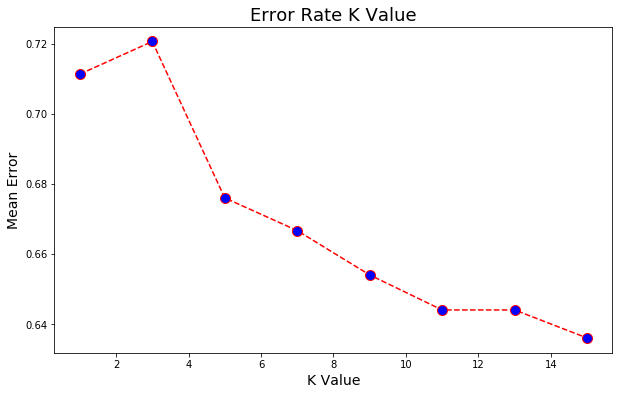

In [18]:
# First of all, we developed a k-NN classification model for the data:

# Imports and setup
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Split dataset into train and test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create k-NN classifier with n_neighbors=3.
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the data.
knn.fit(X_train, y_train)

# Check accuracy of our model on the test data.
print("Accuracy with k=3 is:", knn.score(X_test, y_test))

# Secondly, we checked which value of k between 1 to 17 step 2 is the best choise of n_neighbors and printed the results.
for k in range(1, 17, 2):
    knn2 = KNeighborsClassifier(n_neighbors=k)
    knn2.fit(X_train, y_train)
    acc = knn2.score(X_test, y_test)
    acc_tr = knn2.score(X_train, y_train)
    print("knn (k={}) Accuracy: {}, train accuracy: {}".format(k, acc, acc_tr))

# Thirdly, we calculated the error for k values between 1 to 17 step 2.
error = []

# Calculating error for k values between 1 to 17 step 2.
for k in range(1, 17, 2):
    knn3 = KNeighborsClassifier(n_neighbors=k)
    knn3.fit(X_train, y_train)
    pred_k = knn3.predict(X_test)
    error.append(np.mean(pred_k != y_test))

# We used a plot to describe the error from above.
plt.figure(figsize=(10,6))
plt.title("Error Rate K Value", fontsize=18)  
plt.xlabel("K Value", fontsize=14)  
plt.ylabel("Mean Error", fontsize=14)
plt.plot(range(1, 17, 2), error, color="red", linestyle="dashed", marker="o", markerfacecolor="blue", markersize=10);

# As we can infer from the output below (text and plot), the best k value between 1 to 17 step 2 is 15.
# It's accurary value is the highest and it's error is the lowest.

In [19]:
# In this cell we did a cross validation using Grid Search to find the best k between 1 to 29.

# We created a dictionary with a key and a value to be k values.
k_range = list(range(1, 31, 2))

param_grid = dict(n_neighbors=k_range)

# Grid search to the data.
grid = GridSearchCV(knn, param_grid, scoring="accuracy", cv=5, return_train_score=True)

# Fit the grid to the data.
grid.fit(X_train, y_train)

# Print the best parameters to show the result.
print("The best parameter set found on development set is:", grid.best_params_)

# Getting the mean values of grid search.
means = grid.cv_results_["mean_test_score"]

# Print the grid scores to show the result.
print("\nGrid scores on development set:")
for mean, params in zip(means, grid.cv_results_["params"]):
    print("mean:", mean, "   parameters:", params)


The best parameter set found on development set is: {'n_neighbors': 29}

Grid scores on development set:
mean: 0.279585121602289    parameters: {'n_neighbors': 1}
mean: 0.25528305742898016    parameters: {'n_neighbors': 3}
mean: 0.29044757817290007    parameters: {'n_neighbors': 5}
mean: 0.30474678111587983    parameters: {'n_neighbors': 7}
mean: 0.317319435928878    parameters: {'n_neighbors': 9}
mean: 0.32275005109339877    parameters: {'n_neighbors': 11}
mean: 0.3256125076640098    parameters: {'n_neighbors': 13}
mean: 0.335331289597384    parameters: {'n_neighbors': 15}
mean: 0.3353316983445739    parameters: {'n_neighbors': 17}
mean: 0.3399039444103822    parameters: {'n_neighbors': 19}
mean: 0.34218924994890665    parameters: {'n_neighbors': 21}
mean: 0.34333210709176376    parameters: {'n_neighbors': 23}
mean: 0.3410455753116697    parameters: {'n_neighbors': 25}
mean: 0.3544786429593297    parameters: {'n_neighbors': 27}
mean: 0.3570566114857961    parameters: {'n_neighbors': 2

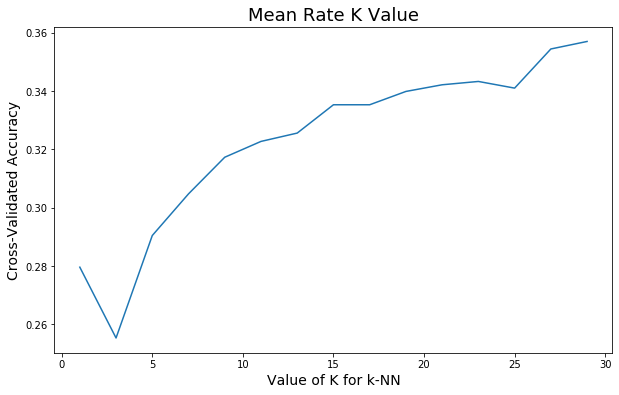

In [20]:
# Here we used a plot to show the result from the cell above.
plt.figure(figsize=(10,6))
plt.title("Mean Rate K Value", fontsize=18)
plt.xlabel("Value of K for k-NN", fontsize=14)
plt.ylabel("Cross-Validated Accuracy", fontsize=14)
plt.plot(k_range, grid.cv_results_["mean_test_score"]);

# As we can infer from the text output above and from the plot output below, the best k value between 1 to 31 is 29.
# It's accurary mean value is the highest and it's error is the lowest.


(4998, 10)


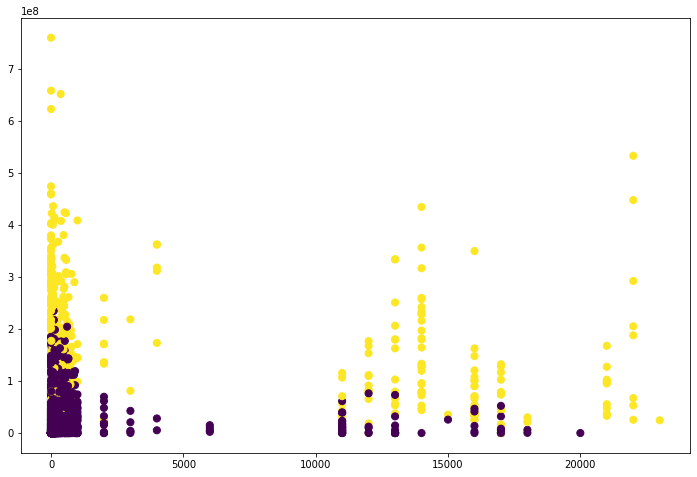

In [26]:
# In the next cells we used k-means to cluster the movies into four clusters.

# imports and setup 
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Storing all the df3 values into X
X = df3.values

# Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Training the model
y_pred = KMeans(n_clusters=2, n_init=1, max_iter=600).fit_predict(X_scaled)

# View in a scatter
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 2], X[:, 5], c=y_pred, marker="o", s=50);

# X axis = director_facebook_likes
# Y axis = movie's gross
print(X.shape)

In [27]:
# Fitting each state to each cluster:
df3 = df3.copy()
df3["predicted"] = y_pred

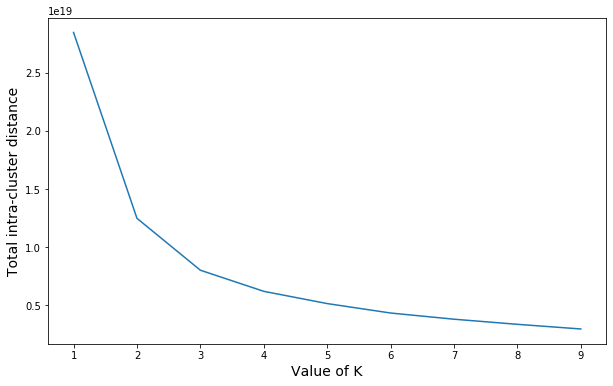

In [28]:
# Clustering from k = 1 to k = 10 for searching the best value
ks = range(1, 10)
scores = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit_predict(X)
    scores.append(-model.score(X))

    # View in a scatter
plt.figure(figsize=(10, 6))
plt.plot(ks, scores)
plt.ylabel("Total intra-cluster distance", fontsize=14)
plt.xlabel("Value of K", fontsize=14)
plt.show()

# As we can see that, the total intra-cluster distance is large for k=1 and decreases as we increase k value, until k=2, 
# after which it tapers off and gets only marginally smaller. This indicates that k=2 is a good choice.

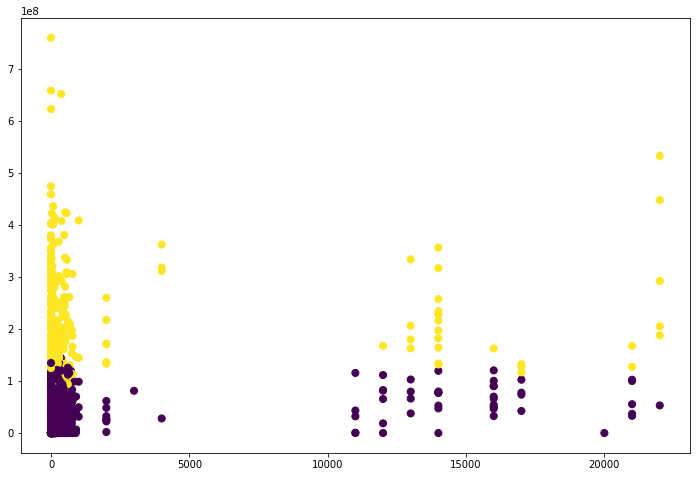

In [29]:
# Varying k value and refining the result with k=2

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:2000], X[y == 1][:1600], X[y == 2][:1200], X[y == 3][:1000], X[y == 4][:800], X[y == 5][:600],
                       X[y == 6][:400], X[y == 7][:200], X[y == 8][:100], X[y == 9][:75], X[y == 10][:50], X[y == 11][:25]))

# Prediction with KMeans (n_clusters=2 as infered from the cell above)
y_pred = KMeans(n_clusters=2, n_init=1, max_iter=600).fit_predict(X_filtered)

# View in a scatter
plt.figure(figsize=(12, 8))
plt.scatter(X_filtered[:, 2], X_filtered[:, 5], c=y_pred, marker="o", s=50);

# X axis = director_facebook_likes
# Y axis = movie's gross
